# Analysis 2
   * Finding out the best director by using Facebook Like,IMDB Score and Average Revenue of all directors
    

In [21]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
movies = pd.read_csv("../data/movie_metadata.csv")
movies['revenue']=movies['gross']-movies['budget']
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,revenue
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN


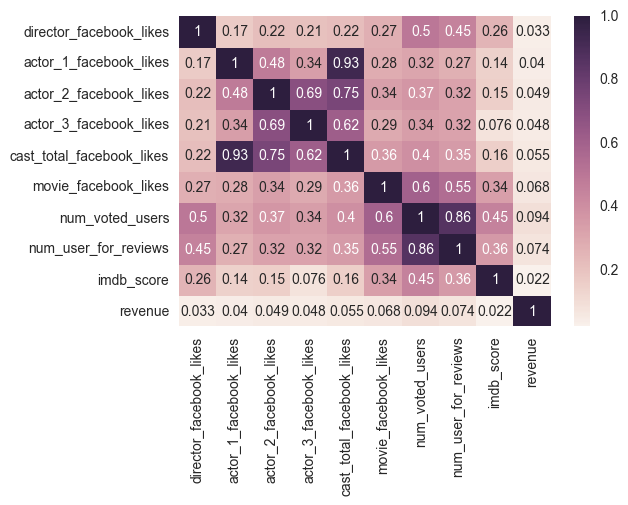

In [13]:
corrcol = ['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','cast_total_facebook_likes','movie_facebook_likes','num_voted_users','num_user_for_reviews','imdb_score','revenue']
mvcorr = movies[corrcol]
mvcorr = mvcorr[mvcorr.director_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.actor_1_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.actor_2_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.cast_total_facebook_likes != 0]
mvcorr = mvcorr[mvcorr.movie_facebook_likes != 0]
correlation = mvcorr[corrcol].corr(method='pearson')
#correlation.to_csv('csv/correlation.csv',encoding='utf-8')
fig, axes = plt.subplots()
sns.heatmap(correlation, annot=True)
plt.show()
plt.close()

In [29]:
topdir = movies.sort_values(by='director_facebook_likes', ascending=0)
topdir = topdir[['director_name','director_facebook_likes']]
topdir = topdir.drop_duplicates()[:50]
topdir = topdir.set_index('director_name')
topdir2 = movies[['director_name','imdb_score']]
topdir2 = topdir2.groupby(['director_name']).mean()
topdir2 = topdir2.dropna()
topdir2 = topdir2.sort_values(by='imdb_score', ascending=0)[:50]
topdir3 = movies[['director_name','revenue']]
topdir3 = topdir3.groupby(['director_name']).mean()
topdir3 = topdir3.dropna()
topdir3 = topdir3.sort_values(by='revenue', ascending=0)[:50]
topdir3.index
topdir4 = movies[['director_name','num_critic_for_reviews']]
topdir4 = topdir4.groupby(['director_name']).mean()
topdir4 = topdir4.dropna()
topdir4 = topdir4.sort_values(by='num_critic_for_reviews', ascending=0)[:50]
topdir4.index


Index(['Benh Zeitlin', 'Drew Goddard', 'Joss Whedon', 'Tim Miller',
       'Michel Hazanavicius', 'Fede Alvarez', 'Steve McQueen',
       'Damien Chazelle', 'Dan Gilroy', 'David Robert Mitchell', 'Ben Affleck',
       'Christopher Nolan', 'J.J. Abrams', 'Alex Garland', 'Mark Andrews',
       'Gareth Evans', 'Alan Taylor', 'Marc Webb', 'Tomas Alfredson',
       'Colin Trevorrow', 'Lee Unkrich', 'Harmony Korine', 'Neill Blomkamp',
       'Zack Snyder', 'Joon-ho Bong', 'Robert Eggers', 'Lenny Abrahamson',
       'Rupert Sanders', 'Shane Black', 'Sam Mendes', 'George Nolfi',
       'Dan Trachtenberg', 'Chris Buck', 'Duncan Jones', 'Ethan Coen',
       'Robert Stromberg', 'Joe Cornish', 'Nicolas Winding Refn',
       'Pete Docter', 'Derek Cianfrance', 'Andrew Stanton',
       'Andrés Muschietti', 'Ethan Maniquis', 'Alfonso Cuarón',
       'Denis Villeneuve', 'Rian Johnson', 'Don Hall', 'Josh Trank',
       'Ryan Coogler', 'James Gunn'],
      dtype='object', name='director_name')

In [27]:
bestdir = topdir.index.intersection(topdir2.index)
bestdir = bestdir.intersection(topdir3.index)
bestdir = bestdir.intersection(topdir4.index)
bestdir

Index(['Christopher Nolan'], dtype='object', name='director_name')

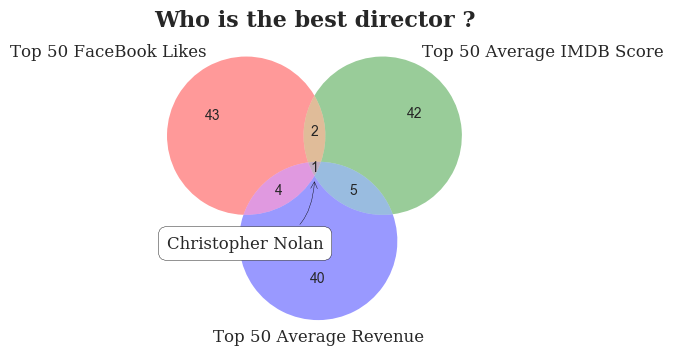

In [30]:
from matplotlib_venn import venn3, venn3_circles
set1 = set(topdir.index.values)
set2 = set(topdir2.index.values)
set3 = set(topdir3.index.values)
v = venn3([set1, set2, set3], ('Top 50 FaceBook Likes', 'Top 50 Average IMDB Score', 'Top 50 Average Revenue'))
plt.title("Who is the best director ?", fontsize=16,fontweight='bold',family='serif')
bestdirstr = ''.join(bestdir)
for text in v.set_labels:
    text.set_fontsize(12)
    text.set_family('serif')
plt.annotate(bestdirstr,fontsize=12,family='serif',xy=v.get_label_by_id('111').get_position()- np.array([0, 0.05]), xytext=(-50,-50),
             ha='center',textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5',fc='white'),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='black'))
plt.show()

In [34]:
correlation.to_csv('ana_2/ana_2.csv',index=True,sep=',')

# Inference
 * Based on the analysis done by comparing all the facebook likes which shows how popular a director is among masses,How much successful he is in terms of revenue generated and imdb score which evolves with time we come to the conclusion that Christopher Nolan is the best director